# Double Pendulum Golf Swings - Hub Motion

## Tucker Knaak - Department of Physics, Creighton University - 2022/2024

#### Both the 2D Planar and 3D Non-Planar Double Pendulum Golf Swings use an accelerating hub model.  In these Double Pendulum Golf Swings, the position along the $x-$axis is given by $h(t)$ and the position along the $y-$axis is given by $v(t)$.

#### This code is used to investigate the planar motion of the arms of PGA Tour golfer Rory McIlroy with data found from Physlet's Tracker.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''Required Functions'''
from IPython.display import display
from scipy.odr import ODR, Model, Data, RealData

#### This cell creates a dataframe from reads the Excel file containing the $xy-$coordinates of the hub of Rory McIlroy.

In [2]:
'''Create dataframe from Excel'''
coords = pd.read_excel('RoryMcIlroyDriverHub.xlsx', names = 
                       ['$t$', '$x_1$', '$y_1$', '$x_2$', '$y_2$', '$x_3$', '$y_3$', '$x_4$', '$y_4$', '$x_5$', '$y_5$'])

'''Print dataframe'''
display(coords.style.hide(axis = 'index'))

$t$,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$,$x_5$,$y_5$
0.000000,-0.122027,0.006839,-0.122027,0.002717,-0.126149,0.006839,-0.126149,0.006839,-0.130271,0.002717
0.039642,-0.117905,-0.005527,-0.117905,-0.013771,-0.117905,-0.009649,-0.122027,-0.013771,-0.126149,-0.013771
0.079283,-0.109661,-0.022015,-0.105539,-0.030258,-0.109661,-0.026137,-0.113783,-0.026137,-0.113783,-0.030258
0.118925,-0.093173,-0.038502,-0.089051,-0.042624,-0.097295,-0.042624,-0.105539,-0.038502,-0.097295,-0.046746
0.158567,-0.080807,-0.050868,-0.068441,-0.059112,-0.076685,-0.059112,-0.080807,-0.054990,-0.072563,-0.063234
0.198208,-0.068441,-0.050868,-0.043709,-0.067356,-0.060197,-0.067356,-0.060197,-0.067356,-0.051953,-0.075600
0.237850,-0.027221,-0.046746,-0.018978,-0.054990,-0.027221,-0.063234,-0.027221,-0.063234,-0.018978,-0.063234
0.277492,-0.002490,-0.038502,0.001632,-0.054990,-0.010734,-0.054990,-0.006612,-0.054990,0.001632,-0.054990
0.317133,0.022242,-0.034380,0.026364,-0.042624,0.013998,-0.046746,0.009876,-0.042624,0.034608,-0.042624
0.356775,0.051096,-0.017893,0.067584,-0.013771,0.055218,-0.030258,0.055218,-0.013771,0.071706,-0.017893


#### This cell creates lists of $t$ points as well as $x$ and $y-$coordinates from the dataframe and finds the averages and standard errors.

In [3]:
'''Create list of times'''
t_points = [float(t) for t in coords.iloc[:,0].tolist()]
t_err = [0.01 for t in t_points]

'''Create lists of x-coordinates from dataframe for each trial'''
x1_points = [float(x) for x in coords.iloc[:,1].tolist()]
x2_points = [float(x) for x in coords.iloc[:,3].tolist()]
x3_points = [float(x) for x in coords.iloc[:,5].tolist()]
x4_points = [float(x) for x in coords.iloc[:,7].tolist()]
x5_points = [float(x) for x in coords.iloc[:,9].tolist()]

'''Find average and error of x-coordinates'''
x_avg = list(np.average([x1_points, x2_points, x3_points, x4_points, x5_points], axis = 0))
x_std = list(np.std([x1_points, x2_points, x3_points, x4_points, x5_points], axis = 0))
x_err = [x / np.sqrt(5) for x in x_std]

'''Create lists of y-coordinates from dataframe for each trial'''
y1_points = [float(y) for y in coords.iloc[:,2].tolist()]
y2_points = [float(y) for y in coords.iloc[:,4].tolist()]
y3_points = [float(y) for y in coords.iloc[:,6].tolist()]
y4_points = [float(y) for y in coords.iloc[:,8].tolist()]
y5_points = [float(y) for y in coords.iloc[:,10].tolist()]

'''Find average and error of y-coordinates'''
y_avg = list(np.average([y1_points, y2_points, y3_points, y4_points, y5_points], axis = 0))
y_std = list(np.std([y1_points, y2_points, y3_points, y4_points, y5_points], axis = 0))
y_err = [y / np.sqrt(5) for y in y_std]

#### This cell plots the $xy-$coordinates from each trial as well as the averages.

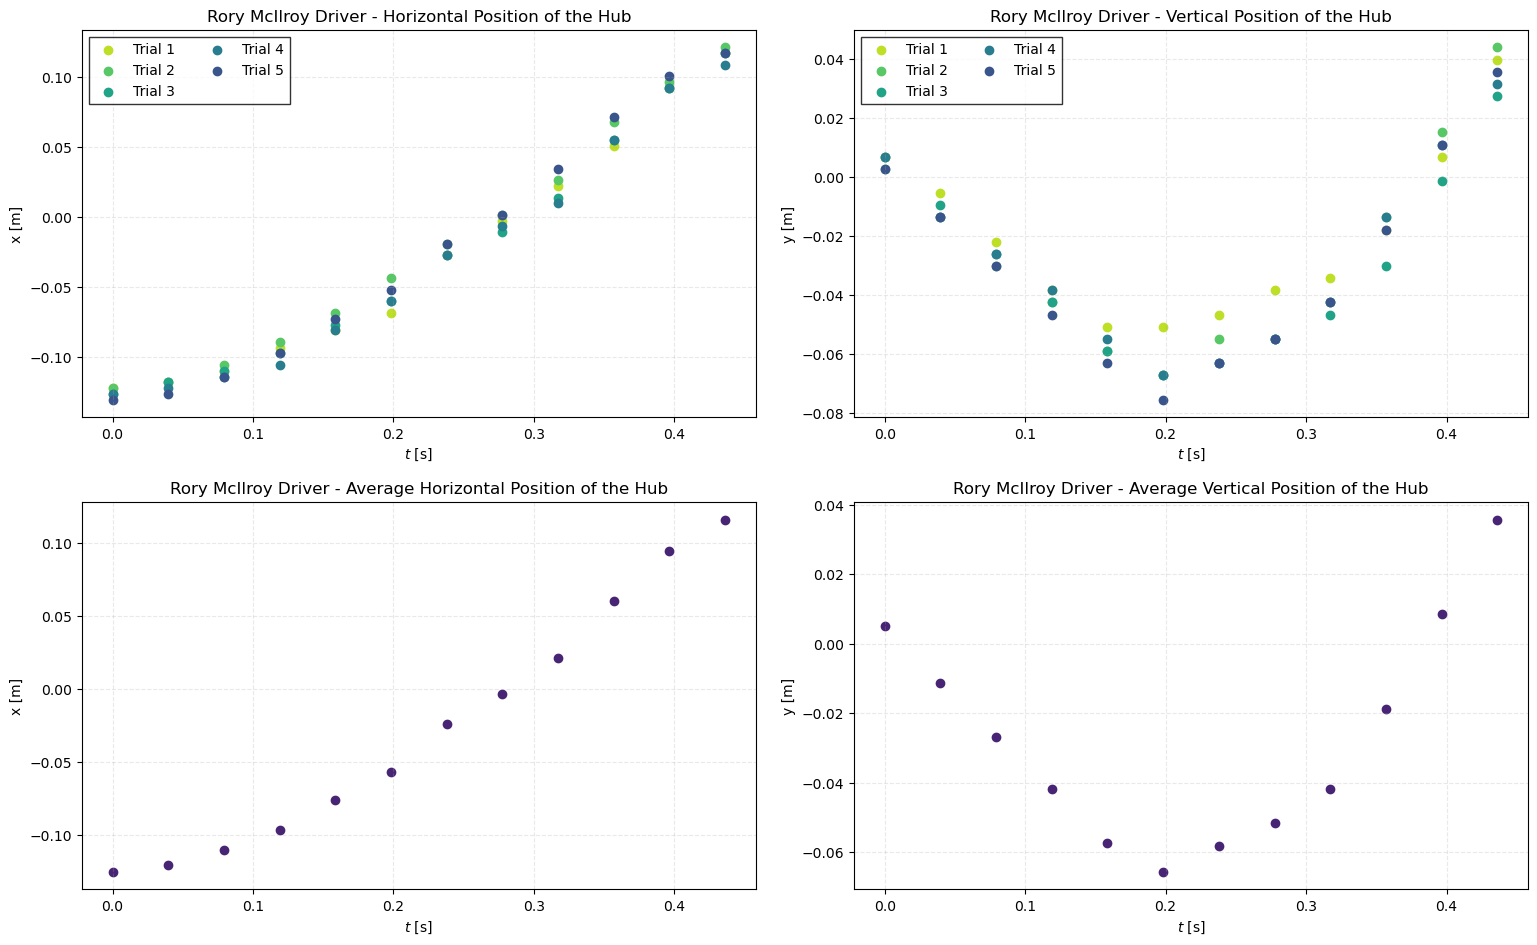

In [4]:
'''Create figure'''
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 10), gridspec_kw = {'width_ratios': [1, 1]})
fig.tight_layout(pad = 4)
colors = plt.cm.viridis(np.linspace(0.9, 0.1, 6))

'''Horizontal data'''
ax1.set_xlabel('$t$ [s]')
ax1.set_ylabel('x [m]')
ax1.set_title('Rory McIlroy Driver - Horizontal Position of the Hub')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax1.scatter(t_points, x1_points, color = colors[0], label = 'Trial 1')
ax1.scatter(t_points, x2_points, color = colors[1], label = 'Trial 2')
ax1.scatter(t_points, x3_points, color = colors[2], label = 'Trial 3')
ax1.scatter(t_points, x4_points, color = colors[3], label = 'Trial 4')
ax1.scatter(t_points, x5_points, color = colors[4], label = 'Trial 5')
legend = ax1.legend(loc = 'upper left', ncol = 2, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Vertical data'''
ax2.set_xlabel('$t$ [s]')
ax2.set_ylabel('y [m]')
ax2.set_title('Rory McIlroy Driver - Vertical Position of the Hub')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax2.scatter(t_points, y1_points, color = colors[0], label = 'Trial 1')
ax2.scatter(t_points, y2_points, color = colors[1], label = 'Trial 2')
ax2.scatter(t_points, y3_points, color = colors[2], label = 'Trial 3')
ax2.scatter(t_points, y4_points, color = colors[3], label = 'Trial 4')
ax2.scatter(t_points, y5_points, color = colors[4], label = 'Trial 5')
legend = ax2.legend(loc = 'upper left', ncol = 2, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Average Horizontal positions'''
ax3.set_xlabel('$t$ [s]')
ax3.set_ylabel('x [m]')
ax3.set_title('Rory McIlroy Driver - Average Horizontal Position of the Hub')
ax3.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax3.scatter(t_points, x_avg, color = colors[5])

'''Average Vertical positions'''
ax4.set_xlabel('$t$ [s]')
ax4.set_ylabel('y [m]')
ax4.set_title('Rory McIlroy Driver - Average Vertical Position of the Hub')
ax4.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax4.scatter(t_points, y_avg, color = colors[5]);

#### This cell performs a linear ODR fit with scipy for the $x-$coordinates.

Horizontal Coefficients
a = 0.6003 ± 0.0340 m/s
b = -0.1567 ± 0.0087 m

Residual Variance and Coefficient of Determination
σ^2 = 6.3310
R^2 = 0.9675


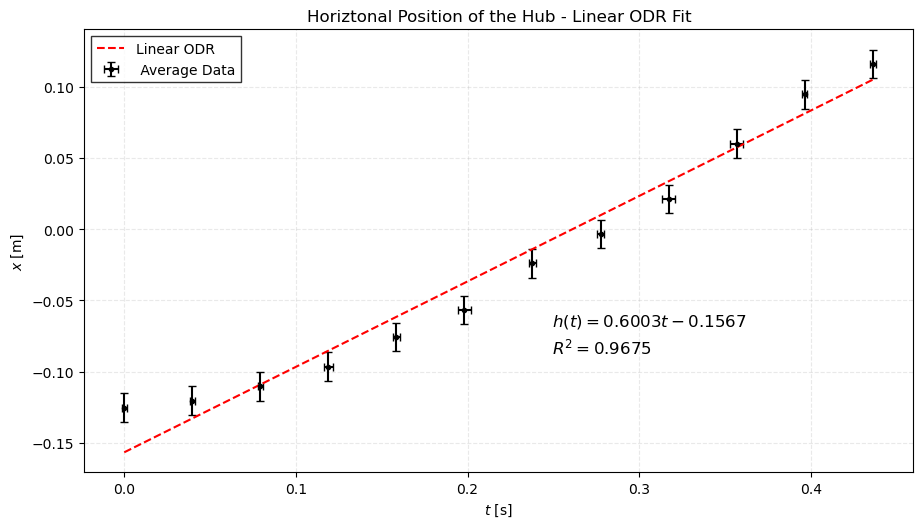

In [5]:
'''Linear function h(t) = at + b for horizontal curvefit'''
def lh_curvefit(params, t):
    return (params[0] * t) + (params[1])

'''Scipy ODR fit'''
data_lh = RealData(t_points, x_avg, t_err, x_err)
model_lh = Model(lh_curvefit)
pguess_lh = [1, -1]
odr_lh = ODR(data_lh, model_lh, pguess_lh)
output_lh = odr_lh.run()
a_lh, a_lh_std = output_lh.beta[0], output_lh.sd_beta[0]  #best fit and standard deviation for beta0
b_lh, b_lh_std = output_lh.beta[1], output_lh.sd_beta[1]  #best fit and standard deviation for beta1
res_var_lh = output_lh.res_var                            #residual variance of the curvefit

'''Find R^2 value of fit'''
x_mean = np.mean(x_avg)
ss_res_lh = 0.0
ss_tot_lh = 0.0
for index in range(len(t_points)):
    ss_res_lh += (lh_curvefit(output_lh.beta, t_points[index]) - x_avg[index])**2
    ss_tot_lh += (x_avg[index] - x_mean)**2
rsquared_lh = 1 - (ss_res_lh / ss_tot_lh)

'''Print results'''
print('Horizontal Coefficients')
print('a = {:.4f} \u00B1 {:.4f} m/s'.format(a_lh, a_lh_std))
print('b = {:.4f} \u00B1 {:.4f} m'.format(b_lh, b_lh_std))
print('')
print('Residual Variance and Coefficient of Determination')
print('\u03C3^2 = {:.4f}'.format(res_var_lh))
print('R^2 = {:.4f}'.format(rsquared_lh))


'''Createlist for range of t values'''
t_range = np.linspace(t_points[0], t_points[-1], 100)


'''Create figure and plot results'''
fig, ax = plt.subplots(figsize = (9, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$x$ [m]')
ax.set_title('Horiztonal Position of the Hub - Linear ODR Fit')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.errorbar(t_points, x_avg, t_err, x_err, capsize = 3, fmt = 'k.', label = ' Average Data')
ax.plot(t_range, lh_curvefit(output_lh.beta, t_range), linestyle = 'dashed', color = 'red', label = 'Linear ODR')
ax.annotate('$h(t) = {:.4f}t - {:.4f}$'.format(a_lh, abs(b_lh)), (0.249, -0.0675), size = 12)
ax.annotate('$R^2 = {:.4f}$'.format(rsquared_lh), (0.249, -0.0875), size = 12)
legend = ax.legend(loc = 'upper left', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/RoryHub_LinearH_ODR.png', bbox_inches = 'tight')

#### This cell performs a quadratic ODR fit with scipy for the $x-$coordinates.

Horizontal Coefficients
a = 0.9789 ± 0.0848 m/s
b = 0.1628 ± 0.0307 m
c = -0.1270 ± 0.0017 m

Residual Variance and Coefficient of Determination
σ^2 = 0.6670
R^2 = 0.9957


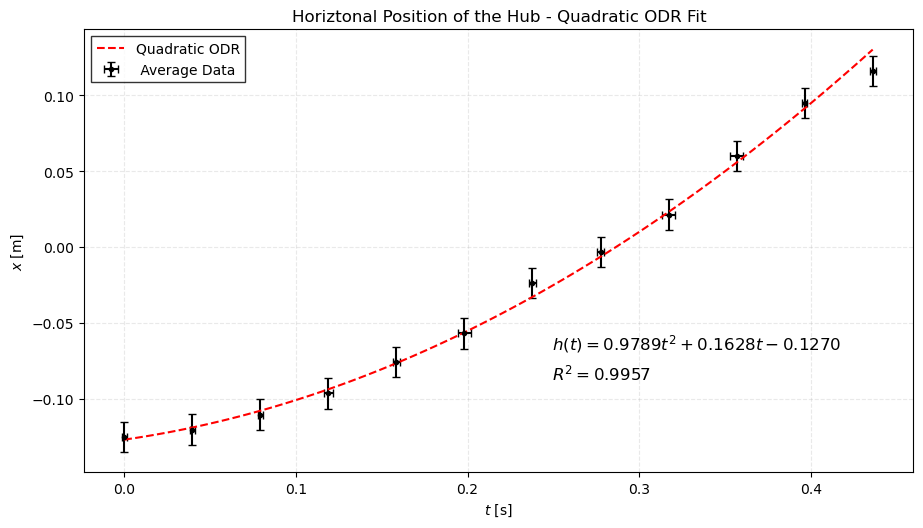

In [6]:
'''Quadratic function h(t) = at^2 + bt + c for horizontal curvefit'''
def qh_curvefit(params, t):
    return (params[0] * t**2) + (params[1] * t) + (params[2])

'''Scipy ODR fit'''
data_qh = RealData(t_points, x_avg, t_err, x_err)
model_qh = Model(qh_curvefit)
pguess_qh = [1, -1, 0.5]
odr_qh = ODR(data_qh, model_qh, pguess_qh)
output_qh = odr_qh.run()
a_qh, a_qh_std = output_qh.beta[0], output_qh.sd_beta[0]  #best fit and standard deviation for a
b_qh, b_qh_std = output_qh.beta[1], output_qh.sd_beta[1]  #best fit and standard deviation for b
c_qh, c_qh_std = output_qh.beta[2], output_qh.sd_beta[2]  #best fit and standard deviation for c
res_var_qh = output_qh.res_var                            #residual variance of the curvefit


'''Find R^2 value of fit'''
x_mean = np.mean(x_avg)
ss_res_qh = 0.0
ss_tot_qh = 0.0
for index in range(len(t_points)):
    ss_res_qh += (qh_curvefit(output_qh.beta, t_points[index]) - x_avg[index])**2
    ss_tot_qh += (x_avg[index] - x_mean)**2
rsquared_qh = 1 - (ss_res_qh / ss_tot_qh)

'''Print results'''
print('Horizontal Coefficients')
print('a = {:.4f} \u00B1 {:.4f} m/s'.format(a_qh, a_qh_std))
print('b = {:.4f} \u00B1 {:.4f} m'.format(b_qh, b_qh_std))
print('c = {:.4f} \u00B1 {:.4f} m'.format(c_qh, c_qh_std))
print('')
print('Residual Variance and Coefficient of Determination')
print('\u03C3^2 = {:.4f}'.format(res_var_qh))
print('R^2 = {:.4f}'.format(rsquared_qh))

'''Create list for the range of t values'''
t_range = np.linspace(t_points[0], t_points[-1], 100)


'''Create figure and plot results'''
fig, ax = plt.subplots(figsize = (9, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$x$ [m]')
ax.set_title('Horiztonal Position of the Hub - Quadratic ODR Fit')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.errorbar(t_points, x_avg, t_err, x_err, capsize = 3, fmt = 'k.', label = ' Average Data')
ax.plot(t_range, qh_curvefit(output_qh.beta, t_range), linestyle = 'dashed', color = 'red', label = 'Quadratic ODR')
ax.annotate('$h(t) = {:.4f}t^2 + {:.4f}t - {:.4f}$'.format(a_qh, b_qh, abs(c_qh)), (0.249, -0.0675), size = 12)
ax.annotate('$R^2 = {:.4f}$'.format(rsquared_qh), (0.249, -0.0875), size = 12)
legend = ax.legend(loc = 'upper left', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/RoryHub_QuadraticH_ODR.png', bbox_inches = 'tight');

#### This cell performs a quadratic ODR fit with scipy for the $y-$coordinates.

Vertical Coefficients
a = 1.8355 ± 0.0990 m/s
b = -0.7584 ± 0.0437 m
c = 0.0170 ± 0.0044 m

Residual Variance and Coefficient of Determination
σ^2 = 0.8930
R^2 = 0.9784


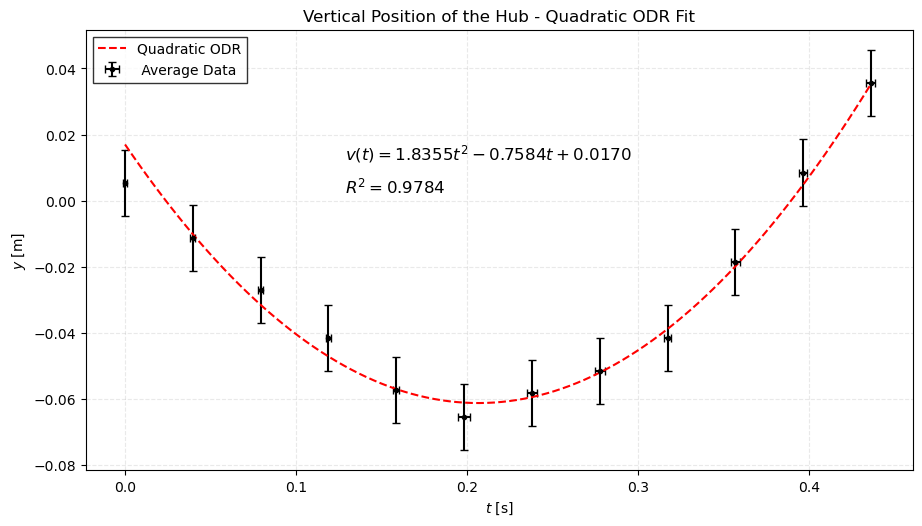

In [7]:
'''Quadratic function v(t) = at^2 + bt + c for vertical curvefit'''
def qv_curvefit(params, t):
    return (params[0] * t**2) + (params[1] * t) + (params[2])

'''Scipy ODR fit'''
data_qv = RealData(t_points, y_avg, t_err, y_err)
model_qv = Model(qv_curvefit)
pguess_qv = [1, -1, 0]
odr_qv = ODR(data_qv, model_qv, pguess_qv)
output_qv = odr_qv.run()
a_qv, a_qv_std = output_qv.beta[0], output_qv.sd_beta[0]  #best fit and standard deviation for a
b_qv, b_qv_std = output_qv.beta[1], output_qv.sd_beta[1]  #best fit and standard deviation for b
c_qv, c_qv_std = output_qv.beta[2], output_qv.sd_beta[2]  #best fit and standard deviation for c
res_var_qv = output_qv.res_var                            #residual variance of the curvefit

'''Find R^2 value of fit'''
y_mean = np.mean(y_avg)
ss_res_qv = 0.0
ss_tot_qv = 0.0
for index in range(len(t_points)):
    ss_res_qv += (qv_curvefit(output_qv.beta, t_points[index]) - y_avg[index])**2
    ss_tot_qv += (y_avg[index] - y_mean)**2
rsquared_qv = 1 - (ss_res_qv / ss_tot_qv)

'''Print results'''
print('Vertical Coefficients')
print('a = {:.4f} \u00B1 {:.4f} m/s'.format(a_qv, a_qv_std))
print('b = {:.4f} \u00B1 {:.4f} m'.format(b_qv, b_qv_std))
print('c = {:.4f} \u00B1 {:.4f} m'.format(c_qv, c_qv_std))
print('')
print('Residual Variance and Coefficient of Determination')
print('\u03C3^2 = {:.4f}'.format(res_var_qv))
print('R^2 = {:.4f}'.format(rsquared_qv))

'''Create list for range of t values'''
t_range = np.linspace(t_points[0], t_points[-1], 100)

'''Create figure and plot results'''
fig, ax = plt.subplots(figsize = (9, 5))
fig.tight_layout()
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$y$ [m]')
ax.set_title('Vertical Position of the Hub - Quadratic ODR Fit')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.errorbar(t_points, y_avg, t_err, y_err, capsize = 3, fmt = 'k.', label = ' Average Data')
ax.plot(t_range, qv_curvefit(output_qv.beta, t_range), linestyle = 'dashed', color = 'red', label = 'Quadratic ODR')
ax.annotate('$v(t) = {:.4f}t^2 - {:.4f}t + {:.4f}$'.format(a_qv, abs(b_qv), c_qv), (0.1285, 0.0125), size = 12)
ax.annotate('$R^2 = {:.4f}$'.format(rsquared_qv), (0.1285, 0.0025), size = 12)
legend = ax.legend(loc = 'upper left', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/RoryHub_QuadraticV_ODR.png', bbox_inches = 'tight')